In [2]:
from graphviz import Digraph

class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        
        self.status = "unvisited"
        self.inTime = None
        self.outTime = None
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        return False
        
    def hasInNeighbor(self, v):
        
        if v in self.inNeighbors:
            return True
        return False
    
    def hasNeighbor(self, v):
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        return False
    
    def getOutNeighbors(self):
        return self.outNeighbors
    
    def getInNeighbors(self):
        return self.inNeighbors
        
    def addOutNeighbor(self, v):
        self.outNeighbors.append(v)
    
    def addInNeighbor(self, v):
        self.inNeighbors.append(v)
    
    def __str__(self):
        return str(self.value) 

class Graph:
    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    # add a directed edge from CS161Node u to CS161Node v
    def addDiEdge(self, u, v):
        
        u.addOutNeighbor(v)
        v.addInNeighbor(u)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v):
        
        self.addDiEdge(u, v)
        self.addDiEdge(v, u)
        
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):
        
        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):
            
            if v.hasOutNeighbor(u) and u.hasInNeighbor(v): 
                return
        
            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)        
                
    def __str__(self):
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

In [19]:

currentTime = 0

def DFS(w, order, verbose):
    global currentTime  # Declare it as global at the beginning
    
    # if verbose:
    #     print("Time", currentTime, ":\t entering", w)
        # w.inTime = currentTime
    print('In time', str(w), currentTime) 
    currentTime += 1
    w.status = "inprogress"
    
    
    for v in w.getOutNeighbors():
        if v.status == "unvisited":
            # currentTime, ordering = DFS(v, currentTime, ordering, verbose)
            DFS(v, order, verbose)
        currentTime += 1
    print('Out time', str(w), currentTime) 
    # w.outTime = currentTime
    
    w.status = "done"
    order.insert(0, w)
    # return order

    
    # if verbose:
    #     print("Time", currentTime, ":\t leaving", w)

    # return currentTime, ordering 


An now the SCC algorithm:

In [20]:
def reverseGraph(graph: Graph):
    reversed_graph = Graph()
    for v in graph.vertices:
        reversed_graph.addVertex(v)
    for u, v in graph.getDirEdges():
        reversed_graph.reverseEdge(u, v)
    return reversed_graph

from copy import deepcopy
def SCC(G_orig: Graph, verbose=False):
    G = deepcopy(G_orig)
    # Step 1: Perform DFS on the original graph to compute finishing times
    for v in G.vertices: 
        v.status = "unvisited"

    order = []
    for v in G.vertices: 
       
        if v.status == "unvisited":
            DFS(v, order, verbose)
    # return order
    # Step 2: Reverse the edges of the graph
    reversed_G = reverseGraph(G)

    for v in reversed_G.vertices: 
        v.status = "unvisited"

    SCCs = [] 
    for node in order: 
        
        if node.status == "unvisited": 
            SCC = []
            DFS(node, SCC, verbose)
            SCCs.append(SCC)
    
    return SCCs

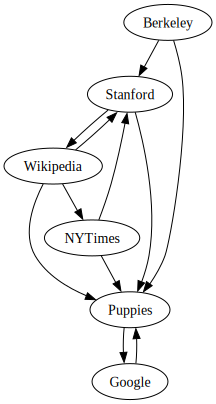

In [21]:
dot = Digraph()

dot.edge('Stanford', 'Wikipedia')
dot.edge('Stanford', 'Puppies')
dot.edge('Wikipedia', 'NYTimes')
dot.edge('Wikipedia', 'Stanford')
dot.edge('NYTimes', 'Stanford')
dot.edge('Berkeley', 'Stanford')
dot.edge('Berkeley', 'Puppies')
dot.edge('Wikipedia', 'Puppies')


dot.edge('NYTimes', 'Puppies')
dot.edge('Puppies', 'Google')
dot.edge( 'Google', 'Puppies')
#dot.view()
dot
    
    

In [22]:
stanford = Node("Stanford")
wiki = Node("Wikipedia")
nytimes = Node("NYTimes")
cal = Node("Berkeley")
puppies = Node("Puppies")
google = Node("Google")

H = Graph()
V = [ stanford, wiki, nytimes, cal, puppies, google ]
for v in V:
    H.addVertex(v)
E = [ (stanford, wiki), (stanford, puppies), (wiki, stanford), (wiki, nytimes), (nytimes, stanford), (cal, stanford), (cal, puppies), (wiki,puppies), (nytimes, puppies), (puppies, google), (google, puppies) ]
print(len(E))
for x,y in E:
    H.addDiEdge( x,y )

SCCs = SCC(H, True)



11
In time Stanford 0
In time Wikipedia 1
In time NYTimes 3
In time Puppies 5
In time Google 6
Out time Google 8
Out time Puppies 9
Out time NYTimes 10
Out time Wikipedia 12
Out time Stanford 14
In time Berkeley 14
Out time Berkeley 17
In time Berkeley 17
Out time Berkeley 18
In time Stanford 18
In time Wikipedia 19
Out time Wikipedia 21
In time NYTimes 22
Out time NYTimes 24
Out time Stanford 26
In time Puppies 26
In time Google 27
Out time Google 29
Out time Puppies 34


In [33]:
for X in SCCs:
    print ([str(x) for x in X])
    


['Berkeley']
['Stanford', 'NYTimes', 'Wikipedia']
['Puppies', 'Google']


***